# Real-world Data Wrangling

Before you start, install the some of the required packages. 

In [1]:
!python -m pip install kaggle==1.6.12

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 13.7 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102969 sha256=fcd0446cce4b396d47665579a3d33bbcb166b9364436447daee4837d3ce500c8
  Stored in directory: /home/student/.cache/pip/wheels/1e/0b/7c/50f8e89c3d2f82838dbd7afeddffbb9357003009ada98216c7
Successfully built kaggle
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
!pip install --target=/workspace ucimlrepo numpy==1.24.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 65.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 84.5 MB/s eta 0:00:0000:0100:01
  Using cached certifi-2025.1.31-py3-none-any.whl (166 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 26.6 MB/s eta 0:00:00


**Note:** Restart the kernel to use updated package(s).

## 1. Gather data

### **1.1.** Problem Statement

The problem I want to look at is what factors are associated with higher rated books. To explore this problem, I will use two related datasets:

books.csv: Contains information about books such as title, authors, ratings.

book_rating.csv: Provides additional user rating data for the books, including user IDs, book IDs, and individual ratings.

### **1.2.** Gather at least two datasets using two different data gathering methods

#### **books**

*I chose this dataset because it includes essential book level metadata like titles, authors, and average ratings.*

Type: *CSV File* 

Method: *The data was gathered using the " Downloading manually" method from Kaggle. I chose manual downloading because the dataset is hosted on Kaggle, and this way is the simplest and most direct method to access it.* 

Dataset variables:

* average_rating: Helps evaluate the popularity or quality of a book.

- authors: Useful to identify which authors tend to have highly-rated books.

In [1]:
#import libraries
import pandas as pd
import requests

In [2]:
#1st data gathering and loading method
books_df= pd.read_csv('books.csv')
books_df.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


#### ratings

i chose this dataset because it offers a user level rating data that can be help with the analysis of the book popularity.

Type: *CSV File*

Method: *it was gatherd using API. i chose this method because it allows to access real time, detailed, and structured book information programmatically, *

Dataset variables:

*   rating: Captures how individual users rate books
*   book_id: Connects this data back to the main book metadata

In [ ]:
#2nd data gathering and loading method

import requests
import pandas as pd

# GitHub raw URL for Book1.csv (public repo)
url = "https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/ratings.csv"

# Download and save to CSV
response = requests.get(url)
response.raise_for_status()

with open("ratings.csv", "wb") as f:
    f.write(response.content)


In [3]:
# Load it with pandas
ratings_df = pd.read_csv("ratings.csv")
print(ratings_df.head())

   user_id  book_id  rating
0        1      258       5
1        2     4081       4
2        2      260       5
3        2     9296       5
4        2     2318       3


## 2. Assess data

### Quality Issue 1:

In [4]:
#FILL IN - Inspecting the dataframe visually
books_df.head(10)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
6,7,5907,5907,1540236,969,618260307,9.780618e+12,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,...,2071616,2196809,37653,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...
7,8,5107,5107,3036731,360,316769177,9.780317e+12,J.D. Salinger,1951.0,The Catcher in the Rye,...,2044241,2120637,44920,109383,185520,455042,661516,709176,https://images.gr-assets.com/books/1398034300m...,https://images.gr-assets.com/books/1398034300s...
8,9,960,960,3338963,311,1416524797,9.781417e+12,Dan Brown,2000.0,Angels & Demons,...,2001311,2078754,25112,77841,145740,458429,716569,680175,https://images.gr-assets.com/books/1303390735m...,https://images.gr-assets.com/books/1303390735s...
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,...,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...


In [5]:
books_df.describe()

,id,book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


from the above we can see that the min original_publication_year is -1750, and this is a wrong entry.

In [6]:
books_df[books_df['original_publication_year']==-1750]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
2075,2076,19351,19351,3802528,266,141026286,9.780141e+12,"Anonymous, N.K. Sandars",-1750.0,Shūtur eli sharrī,...,44345,55856,2247,1551,5850,17627,17485,13343,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...


In [7]:
books_df.shape

(10000, 23)

from the info() we can see that some features has null values like: isbn, isbn13, original_publication_year, original_title.

In [8]:
sum(books_df.duplicated())

0

In [9]:
#FILL IN - Inspecting the dataframe programmatically
sum(ratings_df.duplicated())

0

Issue and justification: Invalid year entry in original_publication_year
The original_publication_year feature (of type float) contains a value with a negative sign (-1750), which is not a valid year. This is a validity issue, as a publication year cannot be negative.

### Quality Issue 2:

In [10]:
#FILL IN - Inspecting the dataframe visually
ratings_df.head(10)

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
5,2,26,4
6,2,315,3
7,2,33,4
8,2,301,5
9,2,2686,5


In [11]:
#Inspecting the dataframe programmatically
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [12]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976479 entries, 0 to 5976478
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   user_id  int64
 1   book_id  int64
 2   rating   int64
dtypes: int64(3)
memory usage: 136.8 MB


Issue and justification: 

Missing values in some features: Several important features contain null (NaN) values, including:

isbn, isbn13, original_title, original_publication_year

### Tidiness Issue 1:

In [13]:
#Inspecting the dataframe visually
books_df.head(10)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
6,7,5907,5907,1540236,969,618260307,9.780618e+12,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,...,2071616,2196809,37653,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...
7,8,5107,5107,3036731,360,316769177,9.780317e+12,J.D. Salinger,1951.0,The Catcher in the Rye,...,2044241,2120637,44920,109383,185520,455042,661516,709176,https://images.gr-assets.com/books/1398034300m...,https://images.gr-assets.com/books/1398034300s...
8,9,960,960,3338963,311,1416524797,9.781417e+12,Dan Brown,2000.0,Angels & Demons,...,2001311,2078754,25112,77841,145740,458429,716569,680175,https://images.gr-assets.com/books/1303390735m...,https://images.gr-assets.com/books/1303390735s...
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,...,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...


Issue and justification: we can say that we have 5 columns for the ratings, rating1 , rating2, rating3, rating4 and rating5. in order to have a tidy dataset each variable should have its own column, and each observation should be a row.

### Tidiness Issue 2: 

In [14]:
#Inspecting the dataframe visually
books_df[['image_url','small_image_url']]

,image_url,small_image_url
0,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...
9995,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


In [15]:
#Inspecting the dataframe programmatically
(books_df['image_url'] == books_df['small_image_url']).sum()

0

Issue and justification: we can see from above that we have 2 columns one is image_url and the other is small_image_url and this breaks the rule of tidiness that talk each row should represent one observation.

## 3. Clean data

In [16]:
# Make copies of the datasets to ensure the raw dataframes 
# are not impacted
books_copy= books_df.copy()
books_copy.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


### **Quality Issue 1: wrong entry in original_publication_year**

In [17]:
books_copy[books_copy['original_publication_year']==-1750]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
2075,2076,19351,19351,3802528,266,141026286,9.780141e+12,"Anonymous, N.K. Sandars",-1750.0,Shūtur eli sharrī,...,44345,55856,2247,1551,5850,17627,17485,13343,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...


In [18]:
# Apply the cleaning strategy
books_copy.loc[books_copy['original_publication_year'] == -1750, 'original_publication_year'] = 1750

In [19]:
#Validate the cleaning was successful
books_copy[books_copy['original_publication_year']==-1750]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url


In [20]:
books_copy[books_copy['original_publication_year']==1750]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
2075,2076,19351,19351,3802528,266,141026286,9.780141e+12,"Anonymous, N.K. Sandars",1750.0,Shūtur eli sharrī,...,44345,55856,2247,1551,5850,17627,17485,13343,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...


Justification: The original_publication_year value's negative sign was removed in order to fix the first problem.  Since publication years cannot be negative, this correction is justified because it most likely was a result of a data entry error.

### **Quality Issue 2: null values**

since the isbn is a unique identifier for books and since there are small number of samples we can drop them.

In [21]:
#FILL IN - Apply the cleaning strategy
books_copy.dropna(subset=['isbn'], inplace=True)


In [22]:
books_copy['original_publication_year'].fillna(books_copy['original_publication_year'].median, inplace=True)

/tmp/ipykernel_13/2854020648.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.median of 0       2008.0
1       1997.0
2       2005.0
3       1960.0
4       1925.0
         ...  
9995    2010.0
9996    1990.0
9997    1977.0
9998    2011.0
9999    1998.0
Name: original_publication_year, Length: 9300, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  books_copy['original_publication_year'].fillna(books_copy['original_publication_year'].median, inplace=True)


In [23]:
books_copy['original_title'].fillna("unknown", inplace=True)

/tmp/ipykernel_13/392062268.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books_copy['original_title'].fillna("unknown", inplace=True)


In [24]:
books_copy['language_code'].fillna(books_copy['language_code'].mode()[0], inplace=True)

/tmp/ipykernel_13/2702269061.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books_copy['language_code'].fillna(books_copy['language_code'].mode()[0], inplace=True)


for the language_code imputing using the mode is used, and with that we will not lose a good rows because the language code is null. 

for the isbn13 first it must be converted to string then we can handle the missing values.

In [25]:
books_copy['isbn13'] = books_copy['isbn13'].astype('Int64').astype('string')
books_copy.dropna(subset=['isbn13'], inplace=True)

In [26]:
#Validate the cleaning was successful
books_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9280 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         9280 non-null   int64  
 1   book_id                    9280 non-null   int64  
 2   best_book_id               9280 non-null   int64  
 3   work_id                    9280 non-null   int64  
 4   books_count                9280 non-null   int64  
 5   isbn                       9280 non-null   object 
 6   isbn13                     9280 non-null   string 
 7   authors                    9280 non-null   object 
 8   original_publication_year  9280 non-null   object 
 9   original_title             9280 non-null   object 
 10  title                      9280 non-null   object 
 11  language_code              9280 non-null   object 
 12  average_rating             9280 non-null   float64
 13  ratings_count              9280 non-null   int64  
 1

Justification: for the isbn and isbn13 the issue is solved by droping the the rows with the null value since they are unique identifiers for the book, for the other features the imputing using the most frequent value is used 

### **Tidiness Issue 1: ratings split across multiple columns **

In [27]:
#Apply the cleaning strategy
books_copy = pd.melt(
    books_copy,
    id_vars=[col for col in books_copy.columns if not col.startswith('ratings_')],  
    value_vars=['ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5'],
    var_name='rating_level',
    value_name='rating_value'
)

# Extract the rating level number (1 to 5)
books_copy['rating_level'] = books_copy['rating_level'].str.extract('(\d)').astype(int)


In [28]:
#Validate the cleaning was successful
rating_result = books_copy.groupby('rating_level').size().reset_index(name='count')
print(rating_result)

   rating_level  count
0             1   9280
1             2   9280
2             3   9280
3             4   9280
4             5   9280


In [29]:
books_copy.shape

(46400, 19)

Justification: to solve the issue the unpivoting is used, which makes the dataset longer and easiest to analyze and reduce the number of columns in the dataset 

### **Tidiness Issue 2: image_url and small_image_url**

In [30]:
books_copy.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,work_ratings_count,work_text_reviews_count,image_url,small_image_url,rating_level,rating_value
0,1,2767052,2767052,2792775,272,439023483,9780439023480,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4942365,155254,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,1,66715
1,2,3,3,4640799,491,439554934,9780439554930,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4800065,75867,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,1,75504
2,3,41865,41865,3212258,226,316015849,9780316015840,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3916824,95009,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,1,456191
3,4,2657,2657,3275794,487,61120081,9780061120080,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3340896,72586,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,1,60427
4,5,4671,4671,245494,1356,743273567,9780743273560,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2773745,51992,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,1,86236


In [31]:
#Apply the cleaning strategy
books_copy = pd.melt(
    books_copy,
    id_vars=[col for col in books_copy.columns if col not in ['image_url', 'small_image_url']],
    value_vars=['image_url', 'small_image_url'],
    var_name='image_size',
    value_name='image_link'
)


In [32]:
#Validate the cleaning was successful
books_copy.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,work_ratings_count,work_text_reviews_count,rating_level,rating_value,image_size,image_link
0,1,2767052,2767052,2792775,272,439023483,9780439023480,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4942365,155254,1,66715,image_url,https://images.gr-assets.com/books/1447303603m...
1,2,3,3,4640799,491,439554934,9780439554930,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4800065,75867,1,75504,image_url,https://images.gr-assets.com/books/1474154022m...
2,3,41865,41865,3212258,226,316015849,9780316015840,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3916824,95009,1,456191,image_url,https://images.gr-assets.com/books/1361039443m...
3,4,2657,2657,3275794,487,61120081,9780061120080,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3340896,72586,1,60427,image_url,https://images.gr-assets.com/books/1361975680m...
4,5,4671,4671,245494,1356,743273567,9780743273560,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2773745,51992,1,86236,image_url,https://images.gr-assets.com/books/1490528560m...


In [33]:
url_result = books_copy.groupby('image_size').size().reset_index(name='count')
print(url_result)

        image_size  count
0        image_url  46400
1  small_image_url  46400


Justification: unpivoting the image_url and small_image_url into a single column using melt function, so now it is not breaks the tidiness rules

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [34]:
#Remove unnecessary variables and combine datasets
books_copy.drop(columns=['isbn13','title','work_text_reviews_count','work_ratings_count','image_size','image_link','id','best_book_id','work_id'],inplace=True)

In [35]:
books_copy.head()

,book_id,books_count,isbn,authors,original_publication_year,original_title,language_code,average_rating,rating_level,rating_value
0,2767052,272,439023483,Suzanne Collins,2008.0,The Hunger Games,eng,4.34,1,66715
1,3,491,439554934,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,4.44,1,75504
2,41865,226,316015849,Stephenie Meyer,2005.0,Twilight,en-US,3.57,1,456191
3,2657,487,61120081,Harper Lee,1960.0,To Kill a Mockingbird,eng,4.25,1,60427
4,4671,1356,743273567,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,3.89,1,86236


the book_id is shared between the 2 dataset so using it the 2 datasets are going to be merged

In [36]:
merged_df= pd.merge(books_copy, ratings_df, on= 'book_id', how='inner')
merged_df.head()

,book_id,books_count,isbn,authors,original_publication_year,original_title,language_code,average_rating,rating_level,rating_value,user_id,rating
0,3,491,439554934,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,4.44,1,75504,451,5
1,3,491,439554934,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,4.44,1,75504,899,3
2,3,491,439554934,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,4.44,1,75504,975,4
3,3,491,439554934,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,4.44,1,75504,1052,3
4,3,491,439554934,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,4.44,1,75504,1143,5


In [37]:
sum(merged_df.duplicated())

3504955

In [38]:
merged_df.drop_duplicates()

,book_id,books_count,isbn,authors,original_publication_year,original_title,language_code,average_rating,rating_level,rating_value,user_id,rating
0,3,491,439554934,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,4.44,1,75504,451,5
1,3,491,439554934,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,4.44,1,75504,899,3
2,3,491,439554934,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,4.44,1,75504,975,4
3,3,491,439554934,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,4.44,1,75504,1052,3
4,3,491,439554934,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,4.44,1,75504,1143,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3504950,8914,31,375700455,John Keegan,1998.0,The First World War,eng,4.00,5,3069,12788,4
3504951,8914,31,375700455,John Keegan,1998.0,The First World War,eng,4.00,5,3069,21993,5
3504952,8914,31,375700455,John Keegan,1998.0,The First World War,eng,4.00,5,3069,3556,5
3504953,8914,31,375700455,John Keegan,1998.0,The First World War,eng,4.00,5,3069,21841,3


## 4. Update your data store

In [40]:
#saving data
books_copy.to_csv("cleaned_books.csv", index=False)
merged_df.to_csv("merged_df.csv", index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 

*Research question:* what factors are associated with higher rated books?

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
books_copy= pd.read_csv('cleaned_books.csv')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


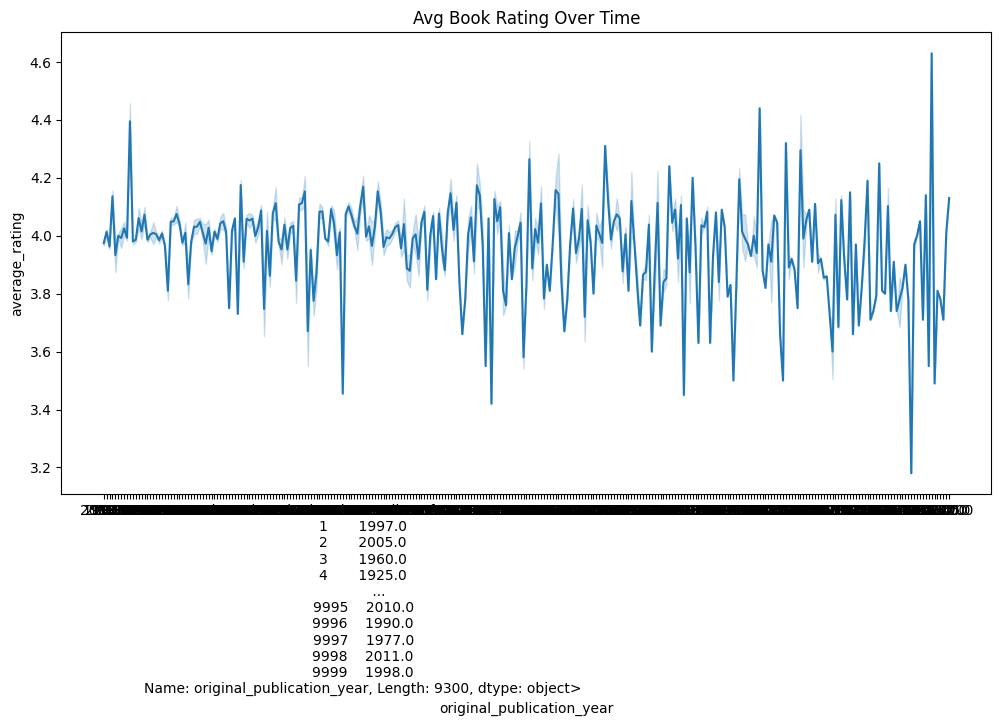

In [43]:
#Visual 1
plt.figure(figsize=(12, 6))
sns.lineplot(data=books_copy, x='original_publication_year', y='average_rating')
plt.title("Avg Book Rating Over Time")
plt.show()

Over time the average book rating has stayed mostly constant, typically falling between 3.6 and 4.2.  Neither a strong upward nor downward trend is present.  However, there are visible short-term shifts, with some years showing peaks or dips, most likely brought on by changes in the quantity of book released.  The ratings have been increasingly unpredictable in recent years, particularly since the 2000s.

<Axes: title={'center': 'average_rating'}, xlabel='language_code'>

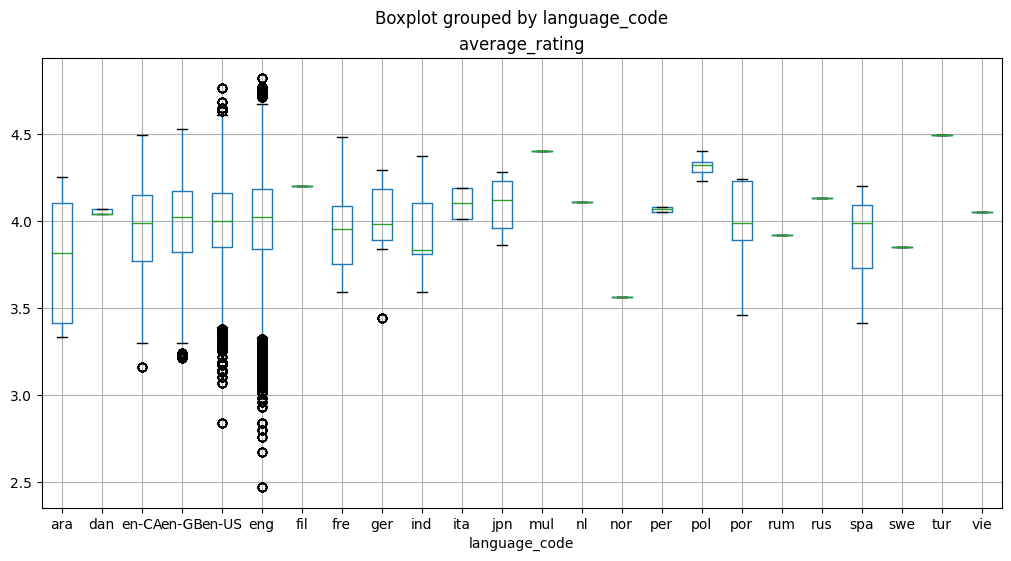

In [44]:
#Visual 2
books_copy.boxplot(column='average_rating', by='language_code', figsize=(12, 6))

*Answer to research question:* There are many outliers and a wide range of ratings for English-language books, some languages such as Portuguese, Polish, and Japanese, are more accurate and have a little higher average ratings. There is very little variation in some languages, such as Dutch and Vietnamese. English-language books show the most variations in book ratings, which are generally positive.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* i will change the data type for the original_publication_year to be of type int not float. aother questions may explore: does the author affect the ratings of the book?